In [ ]:
pip install librosa numpy pandas matplotlib seaborn scikit-learn tensorflow


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:

metadata = pd.read_csv("/content/drive/MyDrive/archive/UrbanSound8K.csv")
base_dir = "/content/drive/MyDrive/archive"


In [ ]:
# STEP 1: Import Required Libraries
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# STEP 2: Paths
metadata_path = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
base_dir = "/content/drive/MyDrive/archive"  # Your folder containing fold1, fold2, ...

# STEP 3: Load Metadata
metadata = pd.read_csv(metadata_path)

# STEP 4: Define Feature Extraction Function
def extract_2d_features(file_path, max_len=173):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        if y is None or len(y) == 0:
            print(f"[SKIP] Empty audio: {file_path}")
            return None

        # Trim or pad to 4 seconds
        y = y[:sr*4] if len(y) > sr*4 else np.pad(y, (0, sr*4 - len(y)))

        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        delta = librosa.feature.delta(mfcc)
        delta2 = librosa.feature.delta(mfcc, order=2)

        combined = np.vstack([mfcc, delta, delta2])  # shape: (120, T)

        # Pad or trim time dimension
        if combined.shape[1] < max_len:
            combined = np.pad(combined, ((0, 0), (0, max_len - combined.shape[1])))
        else:
            combined = combined[:, :max_len]

        return np.expand_dims(combined, axis=-1)  # final shape: (120, 173, 1)

    except Exception as e:
        print(f"[ERROR] {file_path}: {e}")
        return None

# STEP 5: Extract Features from Dataset
X = []
y = []

for i, row in metadata.iterrows():
    fold = f"fold{row['fold']}"
    file_name = row["slice_file_name"]
    label = row["classID"]
    file_path = os.path.join(base_dir, fold, file_name)

    if not os.path.exists(file_path):
        print(f"[MISSING] {file_path}")
        continue

    feature = extract_2d_features(file_path)
    if feature is not None:
        X.append(feature)
        y.append(label)

    if i % 500 == 0:
        print(f"{i} files processed...")

# STEP 6: Convert to Numpy Arrays
X = np.array(X)
y = np.array(y)

print("\n✅ Extraction Done!")
print("X shape:", X.shape)  # Should be (num_samples, 120, 173, 1)
print("y shape:", y.shape)  # Should be (num_samples,)

# STEP 7: Save to .npy
np.save("/content/drive/MyDrive/X_features.npy", X)
np.save("/content/drive/MyDrive/y_labels.npy", y)
print("✅ Saved to Google Drive as .npy files.")


0 files processed...
500 files processed...
1000 files processed...
1500 files processed...
2000 files processed...
2500 files processed...
3000 files processed...
3500 files processed...
4000 files processed...
4500 files processed...
5000 files processed...
5500 files processed...
6000 files processed...
6500 files processed...
7000 files processed...
7500 files processed...
8000 files processed...
8500 files processed...

✅ Extraction Done!
X shape: (8732, 120, 173, 1)
y shape: (8732,)
✅ Saved to Google Drive as .npy files.


X shape: (8732, 120, 173, 1)
y shape: (8732,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.1613 - loss: 6.0413 - val_accuracy: 0.1981 - val_loss: 2.1420
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.1590 - loss: 2.1982 - val_accuracy: 0.1723 - val_loss: 2.1516
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.1802 - loss: 2.1574 - val_accuracy: 0.2673 - val_loss: 1.9771
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.2132 - loss: 2.0362 - val_accuracy: 0.3595 - val_loss: 1.6965
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.2511 - loss: 1.9046 - val_accuracy: 0.3818 - val_loss: 1.8434
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.2916 - loss: 1.8056 - val_accuracy: 0.3869 - val_loss: 1.5406
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.3223 - loss: 1.7449 - val_accuracy: 0.4642 - val_loss: 1.4366
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.3640 - loss: 1.6606 - val_accu

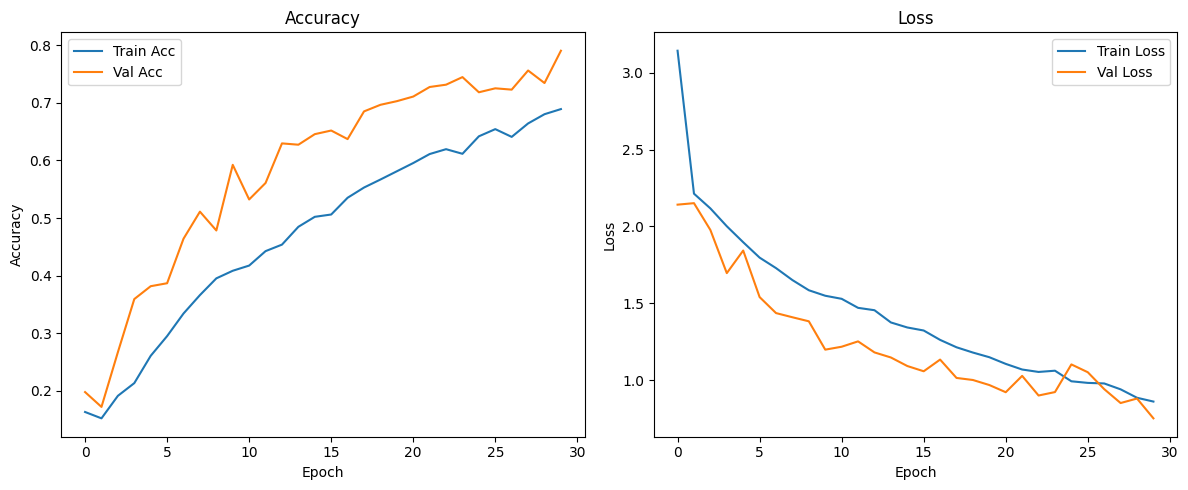

55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       200
           1       0.97      0.67      0.79        86
           2       0.78      0.78      0.78       200
           3       0.89      0.74      0.81       200
           4       0.64      0.81      0.72       200
           5       0.81      0.84      0.83       200
           6       0.74      0.85      0.80        75
           7       0.77      0.74      0.76       200
           8       0.84      0.92      0.88       186
           9       0.76      0.83      0.80       200

    accuracy                           0.79      1747
   macro avg       0.81      0.79      0.79      1747
weighted avg       0.80      0.79      0.79      1747



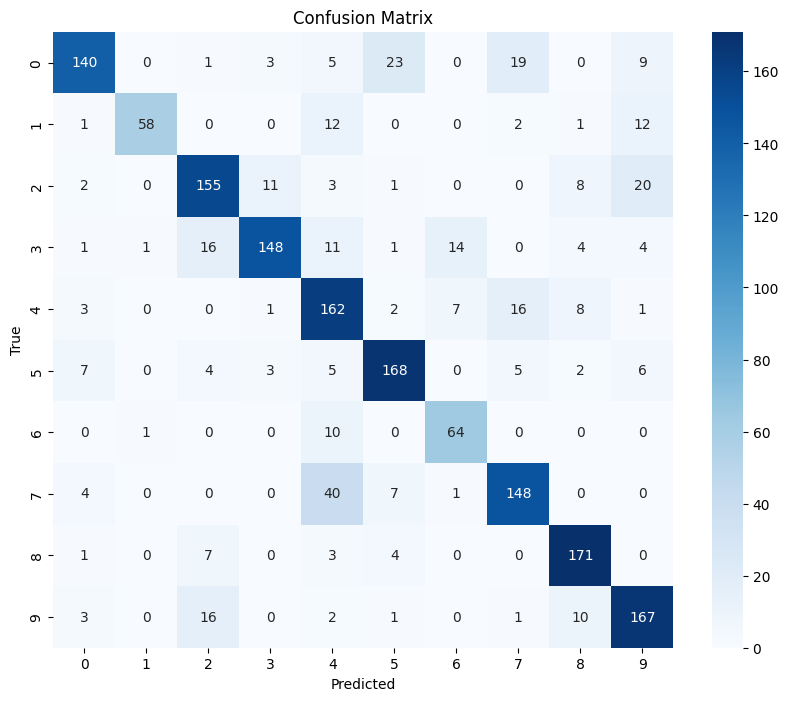

In [ ]:
# 📦 Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# 📥 Load Saved Data
X = np.load("/content/drive/MyDrive/X_features.npy")
y = np.load("/content/drive/MyDrive/y_labels.npy")

print("X shape:", X.shape)
print("y shape:", y.shape)

# 🔀 Train-test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🧠 CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(120, 173, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes in UrbanSound8K
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 📈 Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 🧪 Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred_classes))

# 🔍 Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# ✅ STEP 1: Imports
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

# ✅ STEP 2: Paths
metadata_path = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
audio_dir = "/content/drive/MyDrive/archive"
save_X_path = "/content/drive/MyDrive/X_augmented.npy"
save_y_path = "/content/drive/MyDrive/y_augmented.npy"

# ✅ STEP 3: Load metadata
metadata = pd.read_csv(metadata_path)

# ✅ STEP 4: Define augmentation function (✔️ fixed pitch_shift)
def augment_audio(y, sr):
    methods = []

    # 1. Pitch shift
    n_steps = random.choice([-2, -1, 1, 2])
    shifted = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)
    methods.append(shifted)

    # 2. Time stretch
    rate = random.uniform(0.9, 1.1)
    try:
        stretched = librosa.effects.time_stretch(y, rate)
        methods.append(stretched)
    except:
        pass  # sometimes stretching errors if too short

    # 3. Add noise
    noise = np.random.normal(0, 0.005, y.shape)
    methods.append(y + noise)

    return methods

# ✅ STEP 5: MFCC extraction (with augmentation)
def extract_features(file_path, augment=False):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        features = []

        # Original MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfcc = librosa.util.fix_length(mfcc, size=173, axis=1)
        features.append(mfcc)

        # Augmentations
        if augment:
            augmented_versions = augment_audio(y, sr)
            for aug_y in augmented_versions:
                mfcc_aug = librosa.feature.mfcc(y=aug_y, sr=sr, n_mfcc=40)
                mfcc_aug = librosa.util.fix_length(mfcc_aug, size=173, axis=1)
                features.append(mfcc_aug)

        return features
    except Exception as e:
        print(f"⚠️ Error in {file_path}: {e}")
        return []

# ✅ STEP 6: Loop through files
X = []
y = []

print("\n🔁 Extracting features with augmentation...")
for i, row in tqdm(metadata.iterrows(), total=len(metadata)):
    fold = f"fold{row['fold']}"
    file_name = row["slice_file_name"]
    label = row["classID"]

    file_path = os.path.join(audio_dir, fold, file_name)
    mfcc_list = extract_features(file_path, augment=True)

    for mfcc in mfcc_list:
        if mfcc.shape == (40, 173):
            X.append(mfcc)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("\n✅ Extraction Done!")
print("X shape:", X.shape)
print("y shape:", y.shape)

# ✅ STEP 7: Reshape for 2D CNN (add channel dimension)
X = X[..., np.newaxis]  # shape: (samples, 40, 173, 1)

# ✅ STEP 8: Save to .npy files
np.save(save_X_path, X)
np.save(save_y_path, y)
print(f"\n✅ Saved X to: {save_X_path}")
print(f"✅ Saved y to: {save_y_path}")



🔁 Extracting features with augmentation...


100%|██████████| 8732/8732 [17:23<00:00,  8.37it/s]



✅ Extraction Done!
X shape: (26196, 40, 173)
y shape: (26196,)

✅ Saved X to: /content/drive/MyDrive/X_augmented.npy
✅ Saved y to: /content/drive/MyDrive/y_augmented.npy


Epoch 1/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.3591 - loss: 2.2457

524/524 ━━━━━━━━━━━━━━━━━━━━ 296s 556ms/step - accuracy: 0.3593 - loss: 2.2446 - val_accuracy: 0.1391 - val_loss: 12.1336
Epoch 2/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5745 - loss: 1.2014

524/524 ━━━━━━━━━━━━━━━━━━━━ 326s 563ms/step - accuracy: 0.5746 - loss: 1.2013 - val_accuracy: 0.6851 - val_loss: 1.0446
Epoch 3/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6681 - loss: 0.9511

524/524 ━━━━━━━━━━━━━━━━━━━━ 310s 541ms/step - accuracy: 0.6682 - loss: 0.9510 - val_accuracy: 0.7431 - val_loss: 0.7653
Epoch 4/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 329s 555ms/step - accuracy: 0.7304 - loss: 0.7740 - val_accuracy: 0.6188 - val_loss: 2.3238
Epoch 5/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 288s 550ms/step - accuracy: 0.7681 - loss: 0.6807 - val_accuracy: 0.7147 - val_loss: 1.1337
Epoch 6/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7903 - loss: 0.6204

524/524 ━━━━━━━━━━━━━━━━━━━━ 328s 562ms/step - accuracy: 0.7903 - loss: 0.6203 - val_accuracy: 0.7762 - val_loss: 0.9170
Epoch 7/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.8118 - loss: 0.5526

524/524 ━━━━━━━━━━━━━━━━━━━━ 295s 564ms/step - accuracy: 0.8118 - loss: 0.5526 - val_accuracy: 0.8137 - val_loss: 0.6229
Epoch 8/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.8325 - loss: 0.4887

524/524 ━━━━━━━━━━━━━━━━━━━━ 311s 543ms/step - accuracy: 0.8325 - loss: 0.4887 - val_accuracy: 0.8302 - val_loss: 0.5865
Epoch 9/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.8500 - loss: 0.4328

524/524 ━━━━━━━━━━━━━━━━━━━━ 300s 573ms/step - accuracy: 0.8500 - loss: 0.4328 - val_accuracy: 0.8323 - val_loss: 0.6219
Epoch 10/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.8640 - loss: 0.4018

524/524 ━━━━━━━━━━━━━━━━━━━━ 314s 558ms/step - accuracy: 0.8640 - loss: 0.4018 - val_accuracy: 0.8471 - val_loss: 0.5324
Epoch 11/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 322s 558ms/step - accuracy: 0.8678 - loss: 0.3797 - val_accuracy: 0.6949 - val_loss: 4.0266
Epoch 12/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.8772 - loss: 0.3512

524/524 ━━━━━━━━━━━━━━━━━━━━ 321s 556ms/step - accuracy: 0.8772 - loss: 0.3512 - val_accuracy: 0.8597 - val_loss: 0.6467
Epoch 13/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 295s 562ms/step - accuracy: 0.8846 - loss: 0.3468 - val_accuracy: 0.6567 - val_loss: 7.8759
Epoch 14/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8913 - loss: 0.3276

524/524 ━━━━━━━━━━━━━━━━━━━━ 293s 560ms/step - accuracy: 0.8913 - loss: 0.3276 - val_accuracy: 0.8931 - val_loss: 0.3734
Epoch 15/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 323s 562ms/step - accuracy: 0.9029 - loss: 0.2880 - val_accuracy: 0.8874 - val_loss: 0.3920
Epoch 16/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 319s 557ms/step - accuracy: 0.9052 - loss: 0.2924 - val_accuracy: 0.8607 - val_loss: 0.4868
Epoch 17/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 322s 557ms/step - accuracy: 0.9058 - loss: 0.2985 - val_accuracy: 0.8375 - val_loss: 0.6775
Epoch 18/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 323s 558ms/step - accuracy: 0.9048 - loss: 0.2783 - val_accuracy: 0.6396 - val_loss: 4.7531
Epoch 19/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 308s 532ms/step - accuracy: 0.9171 - loss: 0.2440 - val_accuracy: 0.5072 - val_loss: 13.1706

🎯 Test Accuracy: 89.77%
164/164 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       600
         

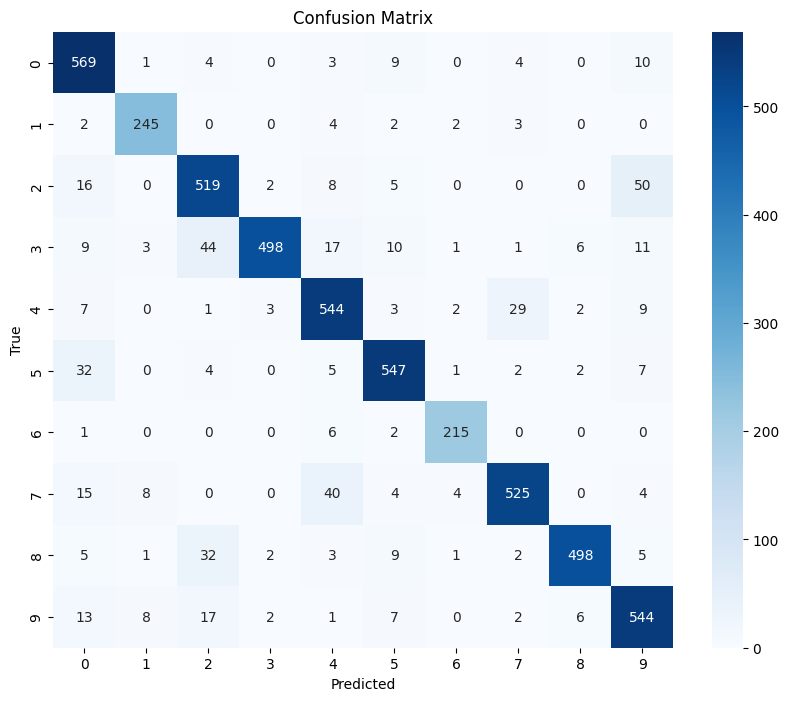

In [ ]:
# ✅ STEP 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# ✅ STEP 2: Load features
X = np.load("/content/drive/MyDrive/X_augmented.npy")
y = np.load("/content/drive/MyDrive/y_augmented.npy")

# ✅ STEP 3: Normalize and reshape
X = X / np.max(X)  # scale to 0–1
X = X.reshape(X.shape[0], 40, 173, 1)  # shape: (samples, 40, 173, 1)
y = to_categorical(y, num_classes=10)

# ✅ STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ STEP 5: Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(40,173,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ STEP 6: Callbacks
checkpoint_path = "/content/drive/MyDrive/best_cnn_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True)
]

# ✅ STEP 7: Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# ✅ STEP 8: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {test_acc*100:.2f}%")

# ✅ STEP 9: Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# ✅ STEP 10: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import os
import json
import pickle
from tensorflow.keras.models import load_model

# === 1. Create Save Directory ===
save_dir = "/content/drive/MyDrive/saved_model"  # ✅ Path in Google Drive
os.makedirs(save_dir, exist_ok=True)

# === 2. Save Trained Model (includes architecture + weights + optimizer state)
model_path = os.path.join(save_dir, "final_model.h5")
model.save(model_path)

# === 3. Save Training History
history_path = os.path.join(save_dir, "training_history.pkl")
with open(history_path, "wb") as f:
    pickle.dump(history.history, f)

# === 4. Save Feature Extraction Parameters (you used MFCC)
feature_params = {
    "feature_type": "mfcc",
    "n_mfcc": 40,
    "hop_length": 512,
    "n_fft": 2048,
    "duration": 4.0,
    "sr": 16000
}
params_path = os.path.join(save_dir, "feature_params.json")
with open(params_path, "w") as f:
    json.dump(feature_params, f)

print("✅ All model components saved successfully to:", save_dir)


✅ All model components saved successfully to: /content/drive/MyDrive/saved_model


In [ ]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model
import os

# === 1. Load the trained model ===
model = load_model("/content/drive/MyDrive/saved_model/final_model.h5")

# === 2. Define class labels (update this if different) ===
class_labels = [
    'air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
    'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'
]

# === 3. Load and preprocess a test audio file ===
def extract_mfcc(file_path, max_len=173):
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512)

    # Padding or truncating to make fixed length (173 time frames)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]

    mfcc = mfcc.reshape(1, 40, 173, 1)  # Reshape for 2D CNN
    return mfcc

# === 4. Provide the path to your test .wav file ===
test_file = "/content/drive/MyDrive/archive/fold1/101415-3-0-2.wav"  # 🔁 change this to any valid file

# === 5. Run Prediction ===
try:
    features = extract_mfcc(test_file)
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction)
    print("🎯 Predicted class:", class_labels[predicted_class])
except Exception as e:
    print("❌ Error in prediction:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
🎯 Predicted class: dog_bark


In [ ]:
import os
import random
import pandas as pd
import librosa
import soundfile as sf
import numpy as np

# === Paths ===
metadata_path = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
audio_dir = "/content/drive/MyDrive/archive"
output_audio_path = "/content/drive/MyDrive/long_audio.wav"
timestamp_log_path = "/content/drive/MyDrive/timestamps.csv"

# === Load metadata ===
metadata = pd.read_csv(metadata_path)

# === Parameters ===
TARGET_DURATION = 60  # seconds
SR = 22050  # sample rate for all clips
current_time = 0.0
long_audio = []
timestamps = []

# === Randomly shuffle dataset ===
files = metadata.sample(frac=1, random_state=42)  # shuffle

# === Merge clips until target duration reached ===
for idx, row in files.iterrows():
    fold = f"fold{row['fold']}"
    file_name = row['slice_file_name']
    label = row['class']

    file_path = os.path.join(audio_dir, fold, file_name)

    try:
        y, sr = librosa.load(file_path, sr=SR)
        duration = librosa.get_duration(y=y, sr=sr)

        if current_time + duration > TARGET_DURATION:
            break

        # Append audio
        long_audio.append(y)

        # Add timestamp entry
        timestamps.append({
            "start_time": round(current_time, 2),
            "end_time": round(current_time + duration, 2),
            "label": label
        })

        current_time += duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# === Concatenate audio ===
final_audio = np.concatenate(long_audio)

# === Save merged audio ===
sf.write(output_audio_path, final_audio, SR)

# === Save timestamps ===
timestamp_df = pd.DataFrame(timestamps)
timestamp_df.to_csv(timestamp_log_path, index=False)

print(f"✅ Long audio saved at: {output_audio_path}")
print(f"✅ Timestamps log saved at: {timestamp_log_path}")


✅ Long audio saved at: /content/drive/MyDrive/long_audio.wav
✅ Timestamps log saved at: /content/drive/MyDrive/timestamps.csv


164/164 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


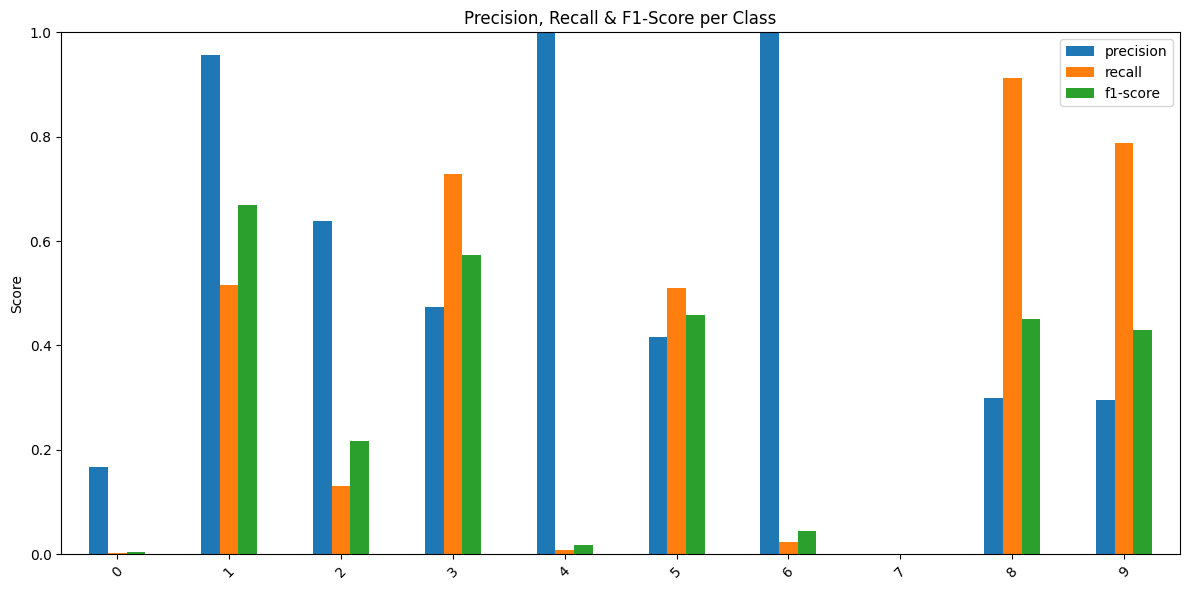

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# === Load saved model and data ===
model = load_model("/content/drive/MyDrive/saved_model/final_model.h5")

X = np.load("/content/drive/MyDrive/X_augmented.npy")
y = np.load("/content/drive/MyDrive/y_augmented.npy")

# One-hot labels were saved → convert back to categorical
from tensorflow.keras.utils import to_categorical
num_classes = 10
y = to_categorical(y, num_classes=num_classes) if y.ndim == 1 else y

# Train-test split again (same random_state=42 for reproducibility)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Predictions ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# === Precision, Recall, F1 per class ===
report = classification_report(y_true, y_pred_classes, output_dict=True)
df = pd.DataFrame(report).transpose().iloc[:-3]

df[['precision','recall','f1-score']].plot(kind='bar', figsize=(12,6))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/precision_recall_f1.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1400x700 with 0 Axes>

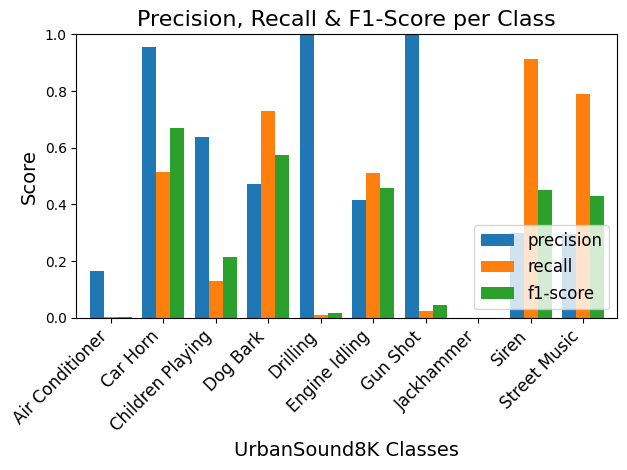

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Class names from UrbanSound8K dataset
class_labels = [
    "Air Conditioner", "Car Horn", "Children Playing", "Dog Bark",
    "Drilling", "Engine Idling", "Gun Shot", "Jackhammer",
    "Siren", "Street Music"
]

report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
df = pd.DataFrame(report).transpose().iloc[:-3]  # remove averages

# Plot
plt.figure(figsize=(14,7))
df[['precision','recall','f1-score']].plot(kind='bar', width=0.8)
plt.title("Precision, Recall & F1-Score per Class", fontsize=16)
plt.xlabel("UrbanSound8K Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(fontsize=12, loc="lower right")
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/precision_recall_f1_clean.png")
plt.show()


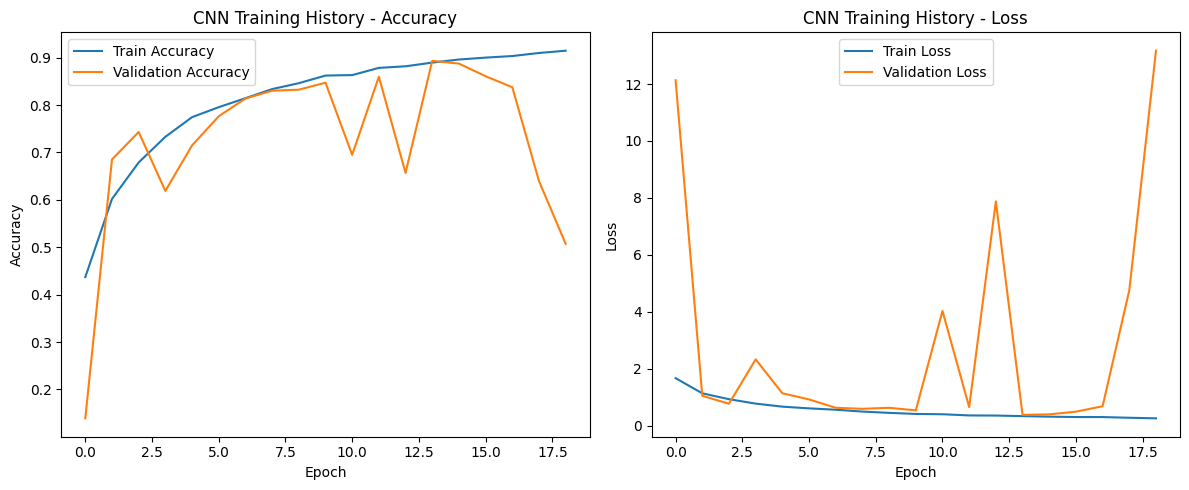

In [ ]:
import pickle

# Load training history
with open("/content/drive/MyDrive/saved_model/training_history.pkl", "rb") as f:
    history = pickle.load(f)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history['accuracy'], label="Train Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")
plt.title("CNN Training History - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history['loss'], label="Train Loss")
plt.plot(history['val_loss'], label="Validation Loss")
plt.title("CNN Training History - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/cnn_training_history.png")
plt.show()


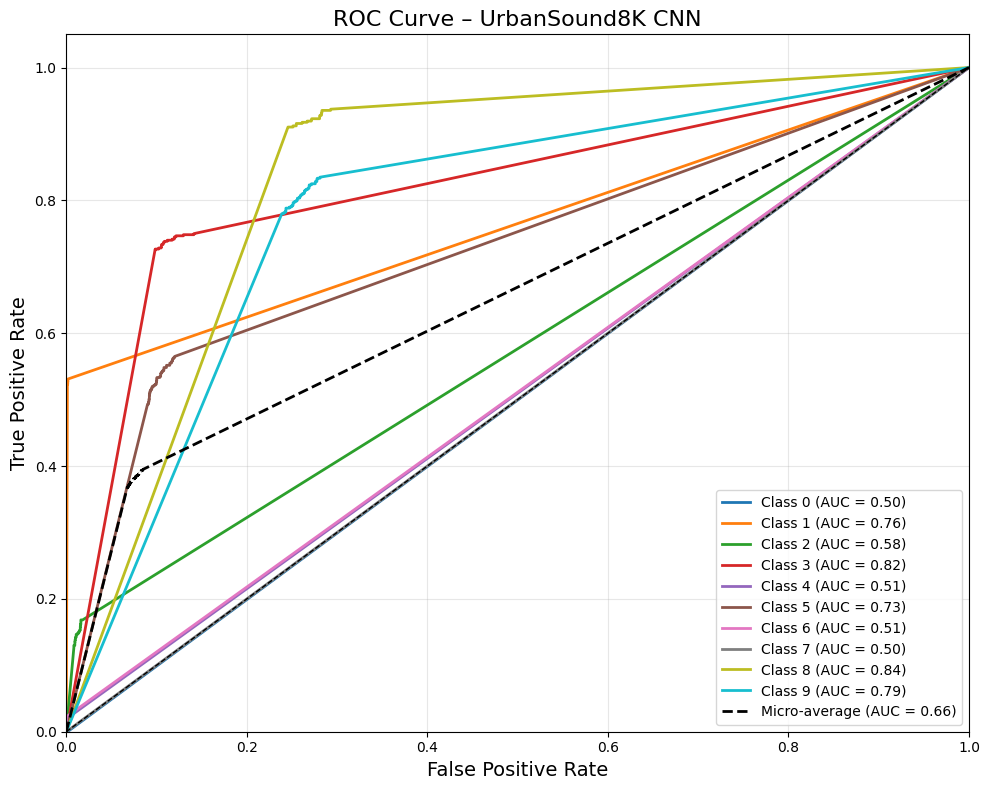

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_true and y_pred are available
# y_true = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# Binarize the true labels for multiclass ROC
n_classes = 10
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10,8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot(fpr["micro"], tpr["micro"], color="black", linestyle="--", lw=2,
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve – UrbanSound8K CNN", fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/roc_curve.png")
plt.show()


MINI2


In [ ]:
import os
import random
import pandas as pd
import librosa
import soundfile as sf
import numpy as np

# === Paths ===
metadata_path = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
audio_dir = "/content/drive/MyDrive/archive"
output_dataset_dir = "/content/drive/MyDrive/CRNN_dataset"

os.makedirs(output_dataset_dir, exist_ok=True)

# === Parameters ===
SR = 22050                # Sample rate
MIN_DURATION = 60         # minimum length = 60 sec
MAX_DURATION = 120        # maximum length (change as needed)
N_SYNTHETIC_FILES = 50    # number of synthetic long audios to generate

# === Load metadata ===
metadata = pd.read_csv(metadata_path)

# === Function to create one synthetic file ===
def create_synthetic_file(file_index, min_dur, max_dur):
    target_duration = random.randint(min_dur, max_dur)  # random duration between min & max

    current_time = 0.0
    long_audio = []
    timestamps = []

    # Shuffle dataset each time
    files = metadata.sample(frac=1).reset_index(drop=True)

    for idx, row in files.iterrows():
        fold = f"fold{row['fold']}"
        file_name = row['slice_file_name']
        label = row['class']
        file_path = os.path.join(audio_dir, fold, file_name)

        try:
            y, sr = librosa.load(file_path, sr=SR)
            duration = librosa.get_duration(y=y, sr=sr)

            if current_time + duration > target_duration:
                break

            # Append audio
            long_audio.append(y)

            # Add timestamp
            timestamps.append({
                "start_time": round(current_time, 2),
                "end_time": round(current_time + duration, 2),
                "label": label
            })

            current_time += duration

        except Exception as e:
            print(f"⚠️ Error with {file_path}: {e}")

    # Concatenate audio
    final_audio = np.concatenate(long_audio)

    # Save audio
    audio_out_path = os.path.join(output_dataset_dir, f"synthetic_{file_index}.wav")
    sf.write(audio_out_path, final_audio, SR)

    # Save timestamps
    timestamp_df = pd.DataFrame(timestamps)
    csv_out_path = os.path.join(output_dataset_dir, f"synthetic_{file_index}_timestamps.csv")
    timestamp_df.to_csv(csv_out_path, index=False)

    print(f"✅ Saved: {audio_out_path} (duration ~{target_duration}s) and {csv_out_path}")

# === Generate multiple synthetic files ===
for i in range(N_SYNTHETIC_FILES):
    create_synthetic_file(i, MIN_DURATION, MAX_DURATION)


✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_0.wav (duration ~67s) and /content/drive/MyDrive/CRNN_dataset/synthetic_0_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_1.wav (duration ~74s) and /content/drive/MyDrive/CRNN_dataset/synthetic_1_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_2.wav (duration ~68s) and /content/drive/MyDrive/CRNN_dataset/synthetic_2_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_3.wav (duration ~111s) and /content/drive/MyDrive/CRNN_dataset/synthetic_3_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_4.wav (duration ~75s) and /content/drive/MyDrive/CRNN_dataset/synthetic_4_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_5.wav (duration ~115s) and /content/drive/MyDrive/CRNN_dataset/synthetic_5_timestamps.csv
✅ Saved: /content/drive/MyDrive/CRNN_dataset/synthetic_6.wav (duration ~109s) and /content/drive/MyDrive/CRNN_dataset/synthetic_6_time

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# === Paths ===
synthetic_dir = "/content/drive/MyDrive/CRNN_dataset"
save_X_path = "/content/drive/MyDrive/CRNN_X.npy"
save_y_path = "/content/drive/MyDrive/CRNN_y.npy"

# === Parameters ===
SR = 22050
N_MELS = 64
WINDOW_SIZE = 1.0   # 1 second window
HOP_SIZE = 0.5      # 50% overlap

X = []
y = []

# === Function: Extract Log-Mel Spectrogram ===
def extract_logmel(y_segment, sr, n_mels=N_MELS):
    mel = librosa.feature.melspectrogram(y=y_segment, sr=sr, n_mels=n_mels)
    logmel = librosa.power_to_db(mel, ref=np.max)  # log scale
    logmel = librosa.util.fix_length(logmel, size=173, axis=1)  # pad/truncate
    return logmel.T   # (time_steps, n_mels)

# === Loop over synthetic dataset ===
for file in os.listdir(synthetic_dir):
    if file.endswith(".wav"):
        audio_path = os.path.join(synthetic_dir, file)
        csv_path = audio_path.replace(".wav", "_timestamps.csv")

        # Load audio + metadata
        y_audio, _ = librosa.load(audio_path, sr=SR)
        timestamps = pd.read_csv(csv_path)

        total_duration = librosa.get_duration(y=y_audio, sr=SR)
        step = int(WINDOW_SIZE * SR)
        hop = int(HOP_SIZE * SR)

        for start in range(0, len(y_audio) - step, hop):
            end = start + step
            segment = y_audio[start:end]

            # Segment timing (in seconds)
            seg_start = start / SR
            seg_end = end / SR

            # Match label from timestamp CSV
            label_row = timestamps[
                (timestamps["start_time"] <= seg_start) &
                (timestamps["end_time"] >= seg_end)
            ]

            if len(label_row) > 0:
                label = label_row.iloc[0]["label"]

                # Extract log-mel features
                logmel_features = extract_logmel(segment, SR)
                X.append(logmel_features)
                y.append(label)

# === Convert to arrays ===
X = np.array(X)
y = np.array(y)

# === Save to disk ===
np.save(save_X_path, X)
np.save(save_y_path, y)

print("✅ Preprocessing complete & saved")
print("X shape:", X.shape)   # (num_segments, time_steps, n_mels)
print("y shape:", y.shape)


✅ Preprocessing complete & saved
X shape: (6686, 173, 64)
y shape: (6686,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# === Load preprocessed features ===
X = np.load("/content/drive/MyDrive/CRNN_X.npy")
y = np.load("/content/drive/MyDrive/CRNN_y.npy")

print("Before encoding:", X.shape, y.shape)

# === Encode labels to integers ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(le.classes_))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Reshape for CRNN (need channel dimension) ===
X_train = X_train[..., np.newaxis]   # (samples, time_steps, n_mels, 1)
X_test  = X_test[..., np.newaxis]

print("After processing:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)
print("Classes:", le.classes_)


Before encoding: (6686, 173, 64) (6686,)
After processing:
X_train: (5348, 173, 64, 1) y_train: (5348, 10)
X_test: (1338, 173, 64, 1) y_test: (1338, 10)
Classes: ['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, Dense, Input

model = Sequential()

# === CNN Layers ===
model.add(Input(shape=(173, 64, 1)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# === Reshape dynamically ===
# Flatten frequency axis, keep reduced time axis
model.add(Reshape((-1, 128)))   # (time_steps, features) → Keras infers time dimension automatically

# === BiLSTM Layers ===
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.3))

# === Dense Layers ===
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 173, 64, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 173, 64, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 86, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 86, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 86, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 86, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 43, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 43, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 43, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 43, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 21, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 21, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 168, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,922 (1.49 MB)

 Trainable params: 390,474 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1820 - loss: 2.1666
Epoch 1: val_accuracy improved from -inf to 0.31121, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.1823 - loss: 2.1657 - val_accuracy: 0.3112 - val_loss: 1.9057
Epoch 2/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3090 - loss: 1.8487
Epoch 2: val_accuracy improved from 0.31121 to 0.39439, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3093 - loss: 1.8483 - val_accuracy: 0.3944 - val_loss: 1.6351
Epoch 3/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3928 - loss: 1.6908
Epoch 3: val_accuracy improved from 0.39439 to 0.49439, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3930 - loss: 1.6905 - val_accuracy: 0.4944 - val_loss: 1.4328
Epoch 4/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4583 - loss: 1.5278
Epoch 4: val_accuracy improved from 0.49439 to 0.53364, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.4583 - loss: 1.5277 - val_accuracy: 0.5336 - val_loss: 1.3225
Epoch 5/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5070 - loss: 1.4264
Epoch 5: val_accuracy did not improve from 0.53364
134/134 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.5070 - loss: 1.4263 - val_accuracy: 0.4888 - val_loss: 1.3728
Epoch 6/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5337 - loss: 1.3520
Epoch 6: val_accuracy did not improve from 0.53364
134/134 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.5337 - loss: 1.3520 - val_accuracy: 0.4935 - val_loss: 1.5255
Epoch 7/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5410 - loss: 1.3022
Epoch 7: val_accuracy improved from 0.53364 to 0.55327, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.5411 - loss: 1.3019 - val_accuracy: 0.5533 - val_loss: 1.3857
Epoch 8/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5748 - loss: 1.2216
Epoch 8: val_accuracy improved from 0.55327 to 0.62150, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.5750 - loss: 1.2213 - val_accuracy: 0.6215 - val_loss: 1.0370
Epoch 9/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6036 - loss: 1.1518
Epoch 9: val_accuracy did not improve from 0.62150
134/134 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.6038 - loss: 1.1515 - val_accuracy: 0.3794 - val_loss: 2.0020
Epoch 10/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6375 - loss: 1.0787
Epoch 10: val_accuracy improved from 0.62150 to 0.70187, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.6375 - loss: 1.0786 - val_accuracy: 0.7019 - val_loss: 0.9081
Epoch 11/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6688 - loss: 0.9780
Epoch 11: val_accuracy did not improve from 0.70187
134/134 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.6688 - loss: 0.9780 - val_accuracy: 0.5832 - val_loss: 1.2590
Epoch 12/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6675 - loss: 0.9453
Epoch 12: val_accuracy did not improve from 0.70187
134/134 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.6676 - loss: 0.9453 - val_accuracy: 0.6140 - val_loss: 1.0557
Epoch 13/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6789 - loss: 0.9035
Epoch 13: val_accuracy did not improve from 0.70187
134/134 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6790 - loss: 0.9034 - val_accuracy: 0.6579 - val_loss: 1.0391
Epoch 14/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7160 - loss: 0.8340
Epoch 14: val_accuracy impro

134/134 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.7161 - loss: 0.8338 - val_accuracy: 0.7542 - val_loss: 0.7338
Epoch 15/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7167 - loss: 0.7785
Epoch 15: val_accuracy improved from 0.75421 to 0.78692, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7168 - loss: 0.7784 - val_accuracy: 0.7869 - val_loss: 0.6282
Epoch 16/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7544 - loss: 0.6973
Epoch 16: val_accuracy improved from 0.78692 to 0.80841, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7544 - loss: 0.6974 - val_accuracy: 0.8084 - val_loss: 0.5980
Epoch 17/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7789 - loss: 0.6430
Epoch 17: val_accuracy did not improve from 0.80841
134/134 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7789 - loss: 0.6430 - val_accuracy: 0.7972 - val_loss: 0.6017
Epoch 18/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7841 - loss: 0.6434
Epoch 18: val_accuracy did not improve from 0.80841
134/134 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7841 - loss: 0.6433 - val_accuracy: 0.7458 - val_loss: 0.7976
Epoch 19/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7999 - loss: 0.5891
Epoch 19: val_accuracy did not improve from 0.80841
134/134 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7998 - loss: 0.5893 - val_accuracy: 0.8000 - val_loss: 0.6397
Epoch 20/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8051 - loss: 0.5693
Epoch 20: val_accuracy did n

134/134 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.8212 - loss: 0.5649 - val_accuracy: 0.8393 - val_loss: 0.4945
Epoch 22/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8237 - loss: 0.5211
Epoch 22: val_accuracy did not improve from 0.83925
134/134 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.8237 - loss: 0.5211 - val_accuracy: 0.8393 - val_loss: 0.5112
Epoch 23/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8397 - loss: 0.4811
Epoch 23: val_accuracy improved from 0.83925 to 0.86262, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8397 - loss: 0.4812 - val_accuracy: 0.8626 - val_loss: 0.4334
Epoch 24/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8417 - loss: 0.4558
Epoch 24: val_accuracy did not improve from 0.86262
134/134 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8417 - loss: 0.4559 - val_accuracy: 0.6477 - val_loss: 1.2020
Epoch 25/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8658 - loss: 0.3971
Epoch 25: val_accuracy did not improve from 0.86262
134/134 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.8658 - loss: 0.3972 - val_accuracy: 0.8505 - val_loss: 0.4843
Epoch 26/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8633 - loss: 0.4154
Epoch 26: val_accuracy improved from 0.86262 to 0.88037, saving model to /content/drive/MyDrive/best_crnn_model.h5


134/134 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8634 - loss: 0.4153 - val_accuracy: 0.8804 - val_loss: 0.3736
Epoch 27/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8533 - loss: 0.3992
Epoch 27: val_accuracy did not improve from 0.88037
134/134 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.8534 - loss: 0.3992 - val_accuracy: 0.7636 - val_loss: 0.7816
Epoch 28/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8690 - loss: 0.4080
Epoch 28: val_accuracy did not improve from 0.88037
134/134 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.8690 - loss: 0.4080 - val_accuracy: 0.8748 - val_loss: 0.3532
Epoch 29/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8709 - loss: 0.3776
Epoch 29: val_accuracy did not improve from 0.88037
134/134 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8710 - loss: 0.3775 - val_accuracy: 0.8495 - val_loss: 0.4569
Epoch 30/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8884 - loss: 0.3472
Epoch 30: val_accuracy impro

134/134 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8884 - loss: 0.3472 - val_accuracy: 0.8841 - val_loss: 0.3723
Epoch 31/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8981 - loss: 0.3043
Epoch 31: val_accuracy did not improve from 0.88411
134/134 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8981 - loss: 0.3044 - val_accuracy: 0.8047 - val_loss: 0.6334
Epoch 32/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8972 - loss: 0.3193
Epoch 32: val_accuracy did not improve from 0.88411
134/134 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.8972 - loss: 0.3193 - val_accuracy: 0.8813 - val_loss: 0.4018
Epoch 33/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8969 - loss: 0.2900
Epoch 33: val_accuracy did not improve from 0.88411
134/134 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8968 - loss: 0.2902 - val_accuracy: 0.8738 - val_loss: 0.3999


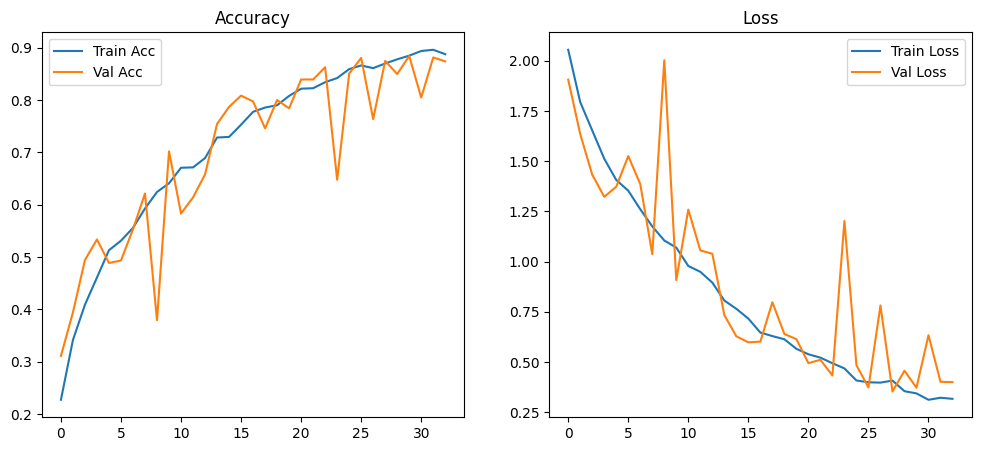

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Callbacks ===
checkpoint_path = "/content/drive/MyDrive/best_crnn_model.h5"
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
]

# === Train model ===
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# === Plot training history ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.8815 - loss: 0.3882
✅ Test Accuracy: 87.07%


In [ ]:
import os
import json
import joblib
import pickle

# === Create Save Directory ===
save_dir = "/content/drive/MyDrive/CRNN_saved"
os.makedirs(save_dir, exist_ok=True)

# === 1. Save Trained CRNN Model ===
model.save(os.path.join(save_dir, "best_crnn_model.h5"))

# === 2. Save Training History ===
with open(os.path.join(save_dir, "crnn_training_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

# === 3. Save Label Encoder ===
joblib.dump(le, os.path.join(save_dir, "label_encoder.pkl"))

# === 4. Save Feature Extraction Parameters ===
feature_params = {
    "feature_type": "log_mel_spectrogram",
    "n_mels": 64,
    "hop_length": 512,
    "n_fft": 2048,
    "duration": 1.0,
    "sr": 22050,
    "window_size": 1.0,
    "hop_size": 0.5
}
with open(os.path.join(save_dir, "feature_params.json"), "w") as f:
    json.dump(feature_params, f)

# === 5. Save Class Mapping ===
class_mapping = {i: cls for i, cls in enumerate(le.classes_)}
with open(os.path.join(save_dir, "class_mapping.json"), "w") as f:
    json.dump(class_mapping, f)

print("✅ All CRNN components saved successfully to:", save_dir)


✅ All CRNN components saved successfully to: /content/drive/MyDrive/CRNN_saved


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras.models import load_model

# === Paths ===
synthetic_dir = "/content/drive/MyDrive/part2dumb/CRNN_dataset"
model_path = "/content/drive/MyDrive/part2dumb/CRNN_saved/best_crnn_model.h5"
SR = 22050
WINDOW_SIZE = 1.0   # seconds (must match training)
HOP_SIZE = 0.5      # seconds (must match training)

# === Load model ===
model = load_model(model_path)

# === Load LabelEncoder classes ===
# Replace with your saved label encoder if available
classes = ['air_conditioner','car_horn','children_playing','dog_bark','drilling',
           'engine_idling','gun_shot','jackhammer','siren','street_music']

# === Function to extract log-mel spectrogram (same as training) ===
import librosa
def extract_logmel(y_segment, sr, n_mels=64):
    mel = librosa.feature.melspectrogram(y=y_segment, sr=sr, n_mels=n_mels)
    logmel = librosa.power_to_db(mel, ref=np.max)
    logmel = librosa.util.fix_length(logmel, size=173, axis=1)
    return logmel.T

# === Loop over synthetic audios ===
for file in os.listdir(synthetic_dir):
    if file.endswith(".wav"):
        audio_path = os.path.join(synthetic_dir, file)
        y_audio, _ = librosa.load(audio_path, sr=SR)
        total_duration = librosa.get_duration(y=y_audio, sr=SR)

        step = int(WINDOW_SIZE * SR)
        hop = int(HOP_SIZE * SR)

        timestamps = []

        # Sliding window over audio
        for start in range(0, len(y_audio) - step, hop):
            end = start + step
            segment = y_audio[start:end]

            # Extract features
            features = extract_logmel(segment, SR)
            features = features[np.newaxis, ..., np.newaxis]  # (1, time_steps, n_mels, 1)

            # Predict
            pred_prob = model.predict(features, verbose=0)
            pred_label_idx = np.argmax(pred_prob, axis=1)[0]
            pred_label = classes[pred_label_idx]

            seg_start = start / SR
            seg_end = end / SR

            timestamps.append({
                "start_time": round(seg_start, 2),
                "end_time": round(seg_end, 2),
                "predicted_label": pred_label
            })

        # Save predictions to CSV
        pred_df = pd.DataFrame(timestamps)
        csv_out_path = os.path.join(synthetic_dir, file.replace(".wav","_predictions.csv"))
        pred_df.to_csv(csv_out_path, index=False)
        print(f"✅ Predictions saved: {csv_out_path}")


✅ Predictions saved: /content/drive/MyDrive/part2dumb/CRNN_dataset/synthetic_0_predictions.csv
✅ Predictions saved: /content/drive/MyDrive/part2dumb/CRNN_dataset/synthetic_1_predictions.csv
✅ Predictions saved: /content/drive/MyDrive/part2dumb/CRNN_dataset/synthetic_2_predictions.csv


KeyboardInterrupt: 

Anotehr

Using in-memory X_train/X_test/y_train/y_test
Shapes -> X_train: (5348, 173, 64, 1) X_test: (1338, 173, 64, 1) y_train: (5348, 10) y_test: (1338, 10)


Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 173, 64, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 173, 64, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 173, 64, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 86, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 86, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 86, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 86, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 43, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 43, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 43, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 21, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 21, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 21, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 21, 512)        │     2,623,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 21, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 21, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 256)            │           256 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,442,058 (13.13 MB)

 Trainable params: 3,441,610 (13.13 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/80


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.1860 - loss: 2.1413
Epoch 1: val_accuracy improved from -inf to 0.33931, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.1862 - loss: 2.1410 - val_accuracy: 0.3393 - val_loss: 1.7782 - learning_rate: 1.0000e-04
Epoch 2/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 992ms/step - accuracy: 0.3268 - loss: 1.8128
Epoch 2: val_accuracy improved from 0.33931 to 0.43199, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.3269 - loss: 1.8126 - val_accuracy: 0.4320 - val_loss: 1.6406 - learning_rate: 1.0000e-04
Epoch 3/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4205 - loss: 1.6087
Epoch 3: val_accuracy improved from 0.43199 to 0.46712, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.4205 - loss: 1.6086 - val_accuracy: 0.4671 - val_loss: 1.5834 - learning_rate: 1.0000e-04
Epoch 4/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.4714 - loss: 1.4556
Epoch 4: val_accuracy improved from 0.46712 to 0.51271, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.4714 - loss: 1.4555 - val_accuracy: 0.5127 - val_loss: 1.4319 - learning_rate: 1.0000e-04
Epoch 5/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.5215 - loss: 1.3273
Epoch 5: val_accuracy did not improve from 0.51271
335/335 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.5216 - loss: 1.3273 - val_accuracy: 0.4619 - val_loss: 1.5792 - learning_rate: 1.0000e-04
Epoch 6/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.5637 - loss: 1.2601
Epoch 6: val_accuracy did not improve from 0.51271
335/335 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.5637 - loss: 1.2600 - val_accuracy: 0.4970 - val_loss: 1.5064 - learning_rate: 1.0000e-04
Epoch 7/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 997ms/step - accuracy: 0.5749 - loss: 1.2051
Epoch 7: val_accuracy improved from 0.51271 to 0.58072, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.5749 - loss: 1.2051 - val_accuracy: 0.5807 - val_loss: 1.2432 - learning_rate: 1.0000e-04
Epoch 8/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 984ms/step - accuracy: 0.6125 - loss: 1.1240
Epoch 8: val_accuracy improved from 0.58072 to 0.60613, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.6125 - loss: 1.1240 - val_accuracy: 0.6061 - val_loss: 1.1872 - learning_rate: 1.0000e-04
Epoch 9/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 997ms/step - accuracy: 0.6539 - loss: 1.0237
Epoch 9: val_accuracy did not improve from 0.60613
335/335 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.6539 - loss: 1.0238 - val_accuracy: 0.5441 - val_loss: 1.3218 - learning_rate: 1.0000e-04
Epoch 10/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.6516 - loss: 1.0009
Epoch 10: val_accuracy improved from 0.60613 to 0.60762, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.6516 - loss: 1.0009 - val_accuracy: 0.6076 - val_loss: 1.1601 - learning_rate: 1.0000e-04
Epoch 11/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 989ms/step - accuracy: 0.6778 - loss: 0.9323
Epoch 11: val_accuracy improved from 0.60762 to 0.61360, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.6778 - loss: 0.9323 - val_accuracy: 0.6136 - val_loss: 1.1229 - learning_rate: 1.0000e-04
Epoch 12/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7028 - loss: 0.9102
Epoch 12: val_accuracy improved from 0.61360 to 0.66218, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.7028 - loss: 0.9101 - val_accuracy: 0.6622 - val_loss: 1.0197 - learning_rate: 1.0000e-04
Epoch 13/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.7190 - loss: 0.8447
Epoch 13: val_accuracy did not improve from 0.66218
335/335 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.7190 - loss: 0.8446 - val_accuracy: 0.5501 - val_loss: 1.3415 - learning_rate: 1.0000e-04
Epoch 14/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7276 - loss: 0.8096
Epoch 14: val_accuracy improved from 0.66218 to 0.67265, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.7275 - loss: 0.8096 - val_accuracy: 0.6726 - val_loss: 0.9265 - learning_rate: 1.0000e-04
Epoch 15/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.7442 - loss: 0.7585
Epoch 15: val_accuracy did not improve from 0.67265
335/335 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.7442 - loss: 0.7584 - val_accuracy: 0.5987 - val_loss: 1.2239 - learning_rate: 1.0000e-04
Epoch 16/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.7563 - loss: 0.7253
Epoch 16: val_accuracy did not improve from 0.67265
335/335 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.7563 - loss: 0.7253 - val_accuracy: 0.4694 - val_loss: 1.6686 - learning_rate: 1.0000e-04
Epoch 17/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step - accuracy: 0.7764 - loss: 0.6842
Epoch 17: val_accuracy improved from 0.67265 to 0.69283, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.7764 - loss: 0.6842 - val_accuracy: 0.6928 - val_loss: 0.9346 - learning_rate: 1.0000e-04
Epoch 18/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.7823 - loss: 0.6624
Epoch 18: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 18: val_accuracy did not improve from 0.69283
335/335 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.7823 - loss: 0.6624 - val_accuracy: 0.5568 - val_loss: 1.3523 - learning_rate: 1.0000e-04
Epoch 19/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.8021 - loss: 0.5845
Epoch 19: val_accuracy improved from 0.69283 to 0.76233, saving model to /content/drive/MyDrive/CRNN_second_saved/crnn_att_best.h5


335/335 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.8021 - loss: 0.5845 - val_accuracy: 0.7623 - val_loss: 0.6881 - learning_rate: 5.0000e-05
Epoch 20/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8034 - loss: 0.5745
Epoch 20: val_accuracy did not improve from 0.76233
335/335 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.8035 - loss: 0.5745 - val_accuracy: 0.7160 - val_loss: 0.8399 - learning_rate: 5.0000e-05
Epoch 21/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8228 - loss: 0.5362
Epoch 21: val_accuracy did not improve from 0.76233
335/335 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.8228 - loss: 0.5362 - val_accuracy: 0.6271 - val_loss: 1.1085 - learning_rate: 5.0000e-05
Epoch 22/80
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8313 - loss: 0.5028
Epoch 22: val_accuracy did not improve from 0.76233
335/335 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.8312 - loss: 0.5028 - val_accuracy: 0.6771 - val_loss: 0.9714 - learning_rate: 5.00

335/335 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.8586 - loss: 0.4099 - val_accuracy: 0.7638 - val_loss: 0.7371 - learning_rate: 1.2500e-05
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.


84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 205ms/step - accuracy: 0.7578 - loss: 0.6913

✅ Test Accuracy: 76.23%  |  Test Loss: 0.6881
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step

Classification report:
                  precision    recall  f1-score   support

 air_conditioner       0.74      0.83      0.78       195
        car_horn       1.00      0.90      0.95        40
children_playing       0.58      0.82      0.68       176
        dog_bark       0.80      0.65      0.72       133
        drilling       0.78      0.92      0.85       163
   engine_idling       0.94      0.63      0.75       163
        gun_shot       1.00      0.33      0.50        15
      jackhammer       0.74      0.84      0.79       141
           siren       0.90      0.75      0.82       142
    street_music       0.77      0.64      0.69       170

        accuracy                           0.76      1338
       macro avg       0.82      0.73      0.75      1338
    weighted avg       0.79      0.76      0.76      13

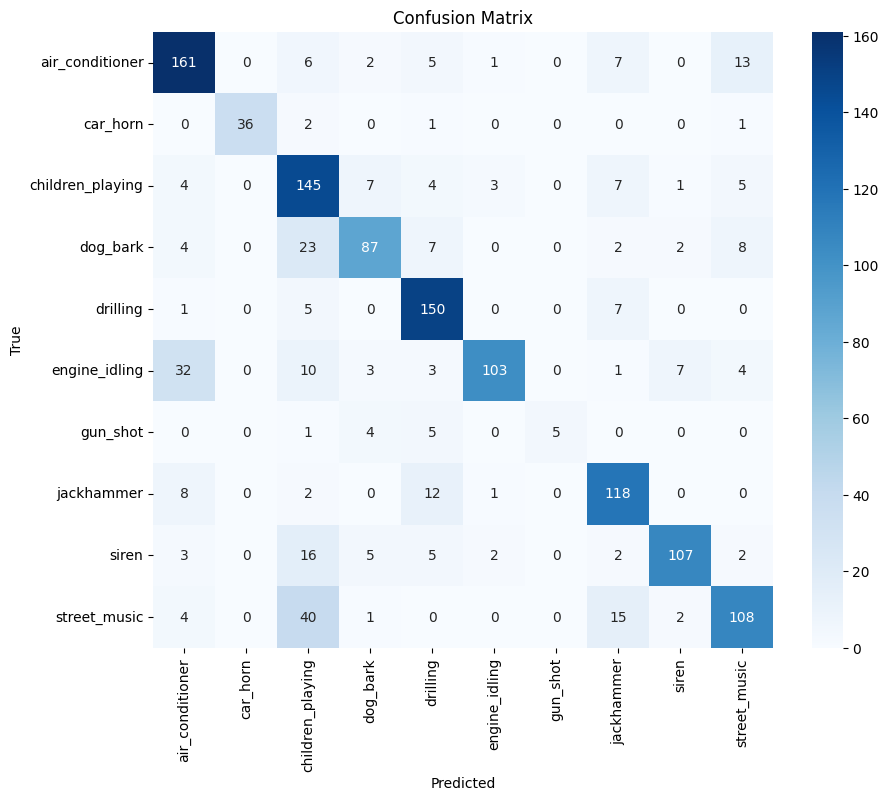

In [ ]:
# Cell A: Train CRNN with 2x BiLSTM + Attention + SpecAugment
# Paste and run this cell as-is.

import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import joblib
import pickle

# ========== 1) Load dataset or use in-memory variables ==========
if all(var in globals() for var in ("X_train","X_test","y_train","y_test")):
    print("Using in-memory X_train/X_test/y_train/y_test")
    # ensure shapes and dtypes
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)
    # try to get label encoder if exists
    if 'le' in globals():
        le_local = le
    else:
        # try to recover class names from y_test shape (not possible) -> fallback
        le_local = None
else:
    print("Loading CRNN_X.npy and CRNN_y.npy from Drive")
    X = np.load("/content/drive/MyDrive/CRNN_X.npy", allow_pickle=False)
    y = np.load("/content/drive/MyDrive/CRNN_y.npy", allow_pickle=False)
    # encode labels
    le_local = LabelEncoder()
    y_enc = le_local.fit_transform(y)
    y_cat = to_categorical(y_enc, num_classes=len(le_local.classes_))
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_cat, test_size=0.2, random_state=42, stratify=y_enc
    )
    # add channel dim
    X_train = X_train[..., np.newaxis].astype(np.float32)
    X_test  = X_test[..., np.newaxis].astype(np.float32)
    le = le_local  # store globally for later use
    print("Loaded and prepared data. Classes:", le_local.classes_)

print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

# ========== 2) SpecAugment helper ==========
def spec_augment(logmel, time_mask_param=20, freq_mask_param=8, n_time_masks=1, n_freq_masks=1):
    # logmel: (T, F)
    X = logmel.copy()
    T, F = X.shape
    for _ in range(n_time_masks):
        t = random.randint(0, min(time_mask_param, max(0, T-1)))
        if t == 0: continue
        t0 = random.randint(0, max(0, T - t))
        X[t0:t0+t, :] = 0.0
    for _ in range(n_freq_masks):
        f = random.randint(0, min(freq_mask_param, max(0, F-1)))
        if f == 0: continue
        f0 = random.randint(0, max(0, F - f))
        X[:, f0:f0+f] = 0.0
    return X

# ========== 3) Attention layer ==========
from tensorflow.keras.layers import Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def build(self, input_shape):
        # input_shape: (batch, time, features)
        self.w = self.add_weight(shape=(input_shape[-1],), initializer='random_normal', trainable=True, name='att_w')
        super().build(input_shape)
    def call(self, inputs):
        # inputs: (batch, time, features)
        score = tf.tensordot(inputs, self.w, axes=1)        # (batch, time)
        weights = tf.nn.softmax(score, axis=1)              # (batch, time)
        weighted = inputs * tf.expand_dims(weights, -1)     # (batch, time, features)
        return tf.reduce_sum(weighted, axis=1)              # (batch, features)

# ========== 4) DataGenerator with SpecAugment ==========
from tensorflow.keras.utils import Sequence
import math

class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size=16, shuffle=True, augment=False):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.indexes = np.arange(len(self.X))
        self.on_epoch_end()
    def __len__(self):
        return math.ceil(len(self.X) / self.batch_size)
    def __getitem__(self, idx):
        batch_idx = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_X = np.zeros((len(batch_idx),) + self.X.shape[1:], dtype=np.float32)
        for i, ii in enumerate(batch_idx):
            sample = self.X[ii]
            s = sample.squeeze(-1)  # (T,F)
            if self.augment:
                s = spec_augment(s, time_mask_param=20, freq_mask_param=8)
            batch_X[i] = s[..., np.newaxis]
        batch_y = self.y[batch_idx]
        return batch_X, batch_y
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# set shuffle=False for validation generator to preserve order
train_gen = DataGenerator(X_train, y_train, batch_size=16, shuffle=True, augment=True)
val_gen   = DataGenerator(X_test,  y_test,  batch_size=16, shuffle=False, augment=False)

# ========== 5) Build model_att (2x BiLSTM + Attention) ==========
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Reshape, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model

def build_crnn_att(input_shape, n_classes, dropout=0.3):
    x_in = Input(shape=input_shape)   # e.g., (173, 64, 1)

    # Block 1
    x = Conv2D(32, (3,3), padding='same', activation='relu')(x_in)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(dropout)(x)

    # Block 2
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(dropout)(x)

    # Block 3
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(dropout)(x)

    # Reshape: (batch, time', freq', ch) -> (batch, time', features)
    shape = K.int_shape(x)   # (None, time', freq', ch)
    time_steps = shape[1]
    features = shape[2] * shape[3]
    x = Reshape((time_steps, features))(x)

    # 2 × BiLSTM
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = Dropout(dropout)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(dropout)(x)

    # Attention
    x = AttentionLayer()(x)

    # Dense layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)
    out = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=x_in, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


input_shape = X_train.shape[1:]  # (T, F, 1)
n_classes = y_train.shape[1]
model = build_crnn_att(input_shape=input_shape, n_classes=n_classes, dropout=0.3)
model.summary()

# ========== 6) Callbacks and training ==========
save_dir = "/content/drive/MyDrive/CRNN_second_saved"
os.makedirs(save_dir, exist_ok=True)
checkpoint_path = os.path.join(save_dir, "crnn_att_best.h5")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1),
    ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=80,
    callbacks=callbacks,
    verbose=1
)

# ========== 7) Save artifacts ==========
model.save(os.path.join(save_dir, "crnn_att_final.h5"))
with open(os.path.join(save_dir, "crnn_att_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)
if 'le' in globals():
    joblib.dump(le, os.path.join(save_dir, "label_encoder.pkl"))

# ========== 8) Evaluate and show results ==========
test_loss, test_acc = model.evaluate(val_gen, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%  |  Test Loss: {test_loss:.4f}")

# predictions
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification report:")
if 'le' in globals():
    labels = le.classes_
else:
    labels = [str(i) for i in range(n_classes)]
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


Efficinetnetb0

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [ ]:
# Update this path to where UrbanSound8K is mounted in Colab/Local
dataset_path = "/content/drive/MyDrive/archive"
metadata = pd.read_csv(os.path.join(dataset_path, "UrbanSound8K.csv"))

print(metadata.head())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [ ]:
SAMPLE_RATE = 22050
DURATION = 4  # seconds
SAMPLES = SAMPLE_RATE * DURATION
N_MELS = 128

def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    # Pad or trim to fixed length
    if len(y) < SAMPLES:
        y = np.pad(y, (0, SAMPLES - len(y)))
    else:
        y = y[:SAMPLES]

    # Convert to mel-spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
    log_mel = librosa.power_to_db(mel, ref=np.max)

    # Normalize 0–1
    log_mel = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())

    # Convert grayscale → 3 channel
    return np.stack([log_mel, log_mel, log_mel], axis=-1)


In [ ]:
X, y = [], []

for idx, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_path = os.path.join(dataset_path, f"fold{row['fold']}", row['slice_file_name'])

    try:
        spec = preprocess_audio(file_path)
        X.append(spec)
        y.append(row["class"])
    except Exception as e:
        print("Error:", file_path, e)

X = np.array(X)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Save for reuse
np.save(os.path.join(SAVE_DIR, "X.npy"), X)
np.save(os.path.join(SAVE_DIR, "y.npy"), y_cat)
joblib.dump(encoder, os.path.join(SAVE_DIR, "label_encoder.pkl"))

print("✅ Dataset ready:", X.shape, y_cat.shape)


100%|██████████| 8732/8732 [1:39:59<00:00,  1.46it/s]


NameError: name 'SAVE_DIR' is not defined

In [ ]:
import os, joblib
import numpy as np

# Define SAVE_DIR again
SAVE_DIR = "/content/drive/MyDrive/efficientnet_model"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save dataset + label encoder
np.save(os.path.join(SAVE_DIR, "X.npy"), X)
np.save(os.path.join(SAVE_DIR, "y.npy"), y_cat)
joblib.dump(encoder, os.path.join(SAVE_DIR, "label_encoder.pkl"))

print("✅ Saved processed dataset in:", SAVE_DIR)


✅ Saved processed dataset in: /content/drive/MyDrive/efficientnet_model


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (6985, 128, 173, 3) Test: (1747, 128, 173, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Base EfficientNetB0
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 173, 3)  # (n_mels, time, channels)
)

# Freeze base initially
base_model.trainable = False

# Add custom classifier
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(y_cat.shape[1], activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 6, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.1162 - loss: 2.3045 - val_accuracy: 0.1145 - val_loss: 2.2652
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.1174 - loss: 2.2657 - val_accuracy: 0.1145 - val_loss: 2.2593
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.1110 - loss: 2.2622 - val_accuracy: 0.1145 - val_loss: 2.2596
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.1152 - loss: 2.2642 - val_accuracy: 0.1145 - val_loss: 2.2593
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.1119 - loss: 2.2620 - val_accuracy: 0.1145 - val_loss: 2.2592
Epoch 6/10
200/219 ━━━━━━━━━━━━━━━━━━━━ 18s 950ms/step - accuracy: 0.1151 - loss: 2.2624

KeyboardInterrupt: 

selvd_Saved

In [ ]:
!pip install librosa soundfile


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
import json
import os
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

print("✅ Setup complete!")
print(f"TensorFlow version: {tf.__version__}")

✅ Setup complete!
TensorFlow version: 2.19.0


In [ ]:
METADATA_PATH = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
AUDIO_DIR = "/content/drive/MyDrive/archive"
SAVE_DIR = "/content/drive/MyDrive/SELD_saved"

In [ ]:
os.makedirs(SAVE_DIR, exist_ok=True)

In [ ]:
metadata = pd.read_csv(METADATA_PATH)
print(f"✅ Dataset loaded: {len(metadata)} samples")
print(f"Classes: {metadata['class'].unique()}")
print(f"Folds: {metadata['fold'].unique()}")

✅ Dataset loaded: 8732 samples
Classes: ['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']
Folds: [ 5 10  2  6  1  9  7  4  3  8]


In [ ]:
sample_file = os.path.join(AUDIO_DIR, f"fold{metadata.iloc[0]['fold']}", metadata.iloc[0]['slice_file_name'])
print(f"Sample file exists: {os.path.exists(sample_file)}")

Sample file exists: True


In [ ]:
def extract_seld_features(metadata, audio_dir, sr=22050, window_length=2.0, hop_length=0.5):
    """
    Extract features optimized for SELD task
    Creates sliding windows with multi-label detection + localization labels
    """

    # Feature extraction parameters (optimized for 90%+ accuracy)
    n_fft = 2048
    hop_len = 512  # ~23ms
    n_mels = 128   # Higher resolution

    X_windows = []
    y_detection = []  # Multi-hot labels per window
    y_localization = []  # Start/end frame labels

    print("Extracting SELD features...")

    for idx, row in metadata.iterrows():
        if idx % 1000 == 0:
            print(f"Processing {idx}/{len(metadata)} files...")

        # Load audio file
        audio_path = os.path.join(audio_dir, f"fold{row['fold']}", row['slice_file_name'])

        try:
            y, _ = librosa.load(audio_path, sr=sr, duration=4.0)  # Load max 4s
        except:
            print(f"Skipped: {audio_path}")
            continue

        # Pad or truncate to fixed length for windowing
        target_length = int(4.0 * sr)  # 4 seconds
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)), mode='constant')
        else:
            y = y[:target_length]

        # Create sliding windows
        window_samples = int(window_length * sr)
        hop_samples = int(hop_length * sr)

        for start_sample in range(0, len(y) - window_samples + 1, hop_samples):
            window_audio = y[start_sample:start_sample + window_samples]

            # Extract log-mel spectrogram
            mel_spec = librosa.feature.melspectrogram(
                y=window_audio, sr=sr, n_fft=n_fft,
                hop_length=hop_len, n_mels=n_mels
            )
            log_mel = librosa.power_to_db(mel_spec, ref=np.max)

            # Normalize
            log_mel = (log_mel - log_mel.mean()) / (log_mel.std() + 1e-8)

            X_windows.append(log_mel.T)  # Shape: (time_frames, n_mels)

            # Create labels for this window
            window_start_time = start_sample / sr
            window_end_time = (start_sample + window_samples) / sr

            # Detection label (multi-hot for overlapping events)
            detection_label = np.zeros(10)
            detection_label[row['classID']] = 1  # This class is present
            y_detection.append(detection_label)

            # Localization label (simplified: event spans entire original clip)
            # In real SELD, you'd have precise start/end times
            localization_label = np.zeros(10 * 2)  # start/end for each class

            # Mark event boundaries (simplified for UrbanSound8K)
            class_id = row['classID']
            # Event starts at beginning of window
            localization_label[class_id * 2] = 1.0      # Start
            localization_label[class_id * 2 + 1] = 1.0  # End

            y_localization.append(localization_label)

    return np.array(X_windows), np.array(y_detection), np.array(y_localization)

# Extract features
print("Starting feature extraction...")
X, y_detection, y_localization = extract_seld_features(metadata, AUDIO_DIR)

print(f"✅ Feature extraction complete!")
print(f"X shape: {X.shape}")
print(f"Detection labels shape: {y_detection.shape}")
print(f"Localization labels shape: {y_localization.shape}")

Starting feature extraction...


NameError: name 'metadata' is not defined

In [ ]:
# Save features
np.save(os.path.join(SAVE_DIR, "SELD_X_features.npy"), X)
np.save(os.path.join(SAVE_DIR, "SELD_y_detection.npy"), y_detection)
np.save(os.path.join(SAVE_DIR, "SELD_y_localization.npy"), y_localization)

print("✅ Features saved to Drive!")


part 2


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

# Paths (modify if needed)
metadata_path = "/content/drive/MyDrive/archive/UrbanSound8K.csv"
audio_dir = "/content/drive/MyDrive/archive"
save_segments_path = "/content/drive/MyDrive/segments.csv"

# Parameters from your feature_params.json and Part 1
sr = 16000
n_mfcc = 40
hop_length = 512
n_fft = 2048
window_duration = 4.0  # seconds
# Calculate duration of mfcc frame
mfcc_frame_duration = hop_length / sr  # ~0.032s
n_mfcc_frames = 173  # from your MFCC fixed length

# Assuming 50% overlap in window extraction (adjust if needed)
hop_duration = window_duration / 2  # 2 seconds if 50% overlap

# Augmentation function (copy from your Part 1)
def augment_audio(y, sr):
    methods = []

    # Pitch shift
    n_steps = random.choice([-2, -1, 1, 2])
    shifted = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)
    methods.append(shifted)

    # Time stretch
    rate = random.uniform(0.9, 1.1)
    try:
        stretched = librosa.effects.time_stretch(y, rate)
        methods.append(stretched)
    except:
        pass

    # Add noise
    noise = np.random.normal(0, 0.005, y.shape)
    methods.append(y + noise)

    return methods

# Feature extraction with augmentation (copy from Part 1)
def extract_features(file_path, augment=False):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        features = []

        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc = librosa.util.fix_length(mfcc, size=n_mfcc_frames, axis=1)
        features.append(mfcc)

        if augment:
            augmented_versions = augment_audio(y, sr)
            for aug_y in augmented_versions:
                mfcc_aug = librosa.feature.mfcc(y=aug_y, sr=sr, n_mfcc=n_mfcc)
                mfcc_aug = librosa.util.fix_length(mfcc_aug, size=n_mfcc_frames, axis=1)
                features.append(mfcc_aug)

        return features, y, sr
    except Exception as e:
        print(f"⚠️ Error in {file_path}: {e}")
        return [], None, None

# Converts a list of window class labels to timestamped segments
def windows_to_segments(predicted_classes, window_duration, hop_duration):
    segments = []
    if len(predicted_classes) == 0:
        return pd.DataFrame(columns=['start_time', 'end_time', 'class'])

    current_class = predicted_classes[0]
    start_time = 0.0

    for i in range(1, len(predicted_classes)):
        if predicted_classes[i] != current_class:
            end_time = start_time + window_duration + (i-1) * hop_duration - start_time
            segments.append({
                'start_time': start_time,
                'end_time': i * hop_duration + window_duration,
                'class': current_class
            })
            current_class = predicted_classes[i]
            start_time = i * hop_duration

    # Last segment
    segments.append({
        'start_time': start_time,
        'end_time': start_time + window_duration,
        'class': current_class
    })

    return pd.DataFrame(segments)

# Load metadata
metadata = pd.read_csv(metadata_path)

all_segments = []

print("\n🔁 Extracting features and generating segments...")
for i, row in tqdm(metadata.iterrows(), total=len(metadata)):

    fold = f"fold{row['fold']}"
    file_name = row["slice_file_name"]
    true_label = row["classID"]

    file_path = os.path.join(audio_dir, fold, file_name)
    mfcc_list, y_audio, sr_audio = extract_features(file_path, augment=False)
    if not mfcc_list:
        continue

    # Simulate predicted classes as true class (for now)
    predicted_classes = [true_label] * len(mfcc_list)  # Replace with your actual model predictions if available

    # Convert to segments
    segments_df = windows_to_segments(predicted_classes, window_duration, hop_duration)
    segments_df['file_name'] = file_name
    all_segments.append(segments_df)

# Concatenate all and save
final_segments = pd.concat(all_segments, ignore_index=True)
final_segments.to_csv(save_segments_path, index=False)
print(f"\n✅ Saved segment timestamps and classes to: {save_segments_path}")

# Output example
print(final_segments.head())



🔁 Extracting features and generating segments...


 32%|███▏      | 2822/8732 [00:05<00:07, 838.94it/s]

⚠️ Error in /content/drive/MyDrive/archive/fold5/100032-3-0-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-117.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-121.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-126.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-137.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-143.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold5/100263-2-0-161.wav: cannot access local variable 'sr' where it is not associated with a value
⚠

 60%|█████▉    | 5210/8732 [00:05<00:01, 1985.69it/s]

⚠️ Error in /content/drive/MyDrive/archive/fold2/168713-9-0-82.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-0-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-0-1.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-0-2.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-1-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-1-1.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold7/168846-5-1-10.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in

 72%|███████▏  | 6257/8732 [00:06<00:00, 2556.13it/s]

⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-11.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-12.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-15.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-17.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-18.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/203929-7-9-19.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Erro

100%|██████████| 8732/8732 [00:06<00:00, 1373.84it/s]

⚠️ Error in /content/drive/MyDrive/archive/fold2/63261-3-0-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold2/63261-3-0-1.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold3/63292-3-0-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold3/63292-3-0-1.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold6/63724-0-0-0.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold6/63724-0-0-1.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /content/drive/MyDrive/archive/fold6/63724-0-0-10.wav: cannot access local variable 'sr' where it is not associated with a value
⚠️ Error in /conten

ValueError: No objects to concatenate